In [1]:
import matplotlib.pyplot as plt

# sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# import functions from scripts
from scripts import times_model_ran, perform_grid_search, evaluate_predictions_plot

# import categorical data: 
from split_data import X_cat_train_scaled_std, X_cat_train_scaled_minmax, y_cat_train # train data
from split_data import X_cat_val_scaled_std, X_cat_val_scaled_minmax, y_cat_val # val data

# import non-categorical data:
from split_data import X_raw_train_scaled_std, X_raw_train_scaled_minmax, y_raw_train # train data
from split_data import X_raw_val_scaled_std, X_raw_val_scaled_minmax, y_raw_val # val data

# Setup for performing GridSearch

### The param_grid variable defined below will be used for tuning all versions of the dataset using Random Forest to ensure comparable results  

Versions are:  
- Categorical Dataset Standardized  
- Categorical Dataset Normalized  
- Non-Categorical Dataset Standardized  
- Non-Categorical Dataset Normalized  

Grid search will be used, after which best parameters will be evaluated and a more narrow grid search will be performed, and so on until sufficiently close parameters have been found

In [2]:
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_features": ["sqrt", "log2", None]
}

print(f"With the specified parameters, model will be fitted {times_model_ran(param_grid)} times")

With the specified parameters, model will be fitted 45 times


# Tuning Parameters - Categorical Dataset - Standardized

## Iteration 1

In [4]:
grid_search_cat_std = perform_grid_search(X_cat_train_scaled_std, y_cat_train, param_grid, RandomForestClassifier(random_state = 42))

Grid search results

-------------------

'criterion' best param: entropy
 out of: ['gini', 'entropy', 'log_loss']

'max_features' best param: sqrt
 out of: ['sqrt', 'log2', None]

-------------------

Best score: 0.6513155897378767


# Tuning Parameters - Categorical Dataset - Normalized

## Iteration 1

In [6]:
grid_search_cat_minmax = perform_grid_search(X_cat_train_scaled_minmax, y_cat_train, param_grid, RandomForestClassifier(random_state = 42))

Grid search results

-------------------

'criterion' best param: entropy
 out of: ['gini', 'entropy', 'log_loss']

'max_features' best param: None
 out of: ['sqrt', 'log2', None]

-------------------

Best score: 0.651239176021425


# Tuning Parameters - Non-Categorical Dataset - Standardized

## Iteration 1

In [7]:
grid_search_raw_std = perform_grid_search(X_raw_train_scaled_std, y_raw_train, param_grid, RandomForestClassifier(random_state = 42))

Grid search results

-------------------

'criterion' best param: entropy
 out of: ['gini', 'entropy', 'log_loss']

'max_features' best param: None
 out of: ['sqrt', 'log2', None]

-------------------

Best score: 0.6893086077773939


# Tuning Parameters - Non-Categorical Dataset - Normalized

## Iteration 1

In [9]:
grid_search_raw_minmax = perform_grid_search(X_raw_train_scaled_minmax, y_raw_train, param_grid, RandomForestClassifier(random_state = 42))

Grid search results

-------------------

'criterion' best param: entropy
 out of: ['gini', 'entropy', 'log_loss']

'max_features' best param: None
 out of: ['sqrt', 'log2', None]

-------------------

Best score: 0.6894132940126474


# Predictions on Validation Data

### Categorical

In [11]:
# standardized
grid_search_cat_std.best_estimator_.get_params() # get best parameters
y_cat_std_pred = grid_search_cat_std.predict(X_cat_val_scaled_std) # make predictions on val based on them

# normalized
grid_search_cat_minmax.best_estimator_.get_params() # get best parameters
y_cat_minmax_pred = grid_search_cat_minmax.predict(X_cat_val_scaled_minmax) # make predictions on val based on them

### Non-Categorical

In [12]:
# standardized
grid_search_raw_std.best_estimator_.get_params() # get best parameters
y_raw_std_pred = grid_search_raw_std.predict(X_raw_val_scaled_std) # make predictions on val based on them

# normalized
grid_search_raw_minmax.best_estimator_.get_params() # get best parameters
y_raw_minmax_pred = grid_search_raw_minmax.predict(X_raw_val_scaled_minmax) # make predictions on val based on them

# Evaluating Performance of Model Versions

### Categorical Standardized

In [13]:
print(classification_report(y_cat_val, y_cat_std_pred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70      6673
           1       0.71      0.61      0.65      6607

    accuracy                           0.68     13280
   macro avg       0.68      0.68      0.68     13280
weighted avg       0.68      0.68      0.68     13280



### Categorical Normalized

In [14]:
print(classification_report(y_cat_val, y_cat_minmax_pred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70      6673
           1       0.71      0.61      0.65      6607

    accuracy                           0.68     13280
   macro avg       0.68      0.68      0.68     13280
weighted avg       0.68      0.68      0.68     13280



### Non-Categorical Standardized

In [15]:
print(classification_report(y_raw_val, y_raw_std_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      6673
           1       0.69      0.69      0.69      6607

    accuracy                           0.69     13280
   macro avg       0.69      0.69      0.69     13280
weighted avg       0.69      0.69      0.69     13280



### Non-Categorical Normalized

In [16]:
print(classification_report(y_raw_val, y_raw_minmax_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      6673
           1       0.69      0.69      0.69      6607

    accuracy                           0.69     13280
   macro avg       0.69      0.69      0.69     13280
weighted avg       0.69      0.69      0.69     13280



# Plotting Performance

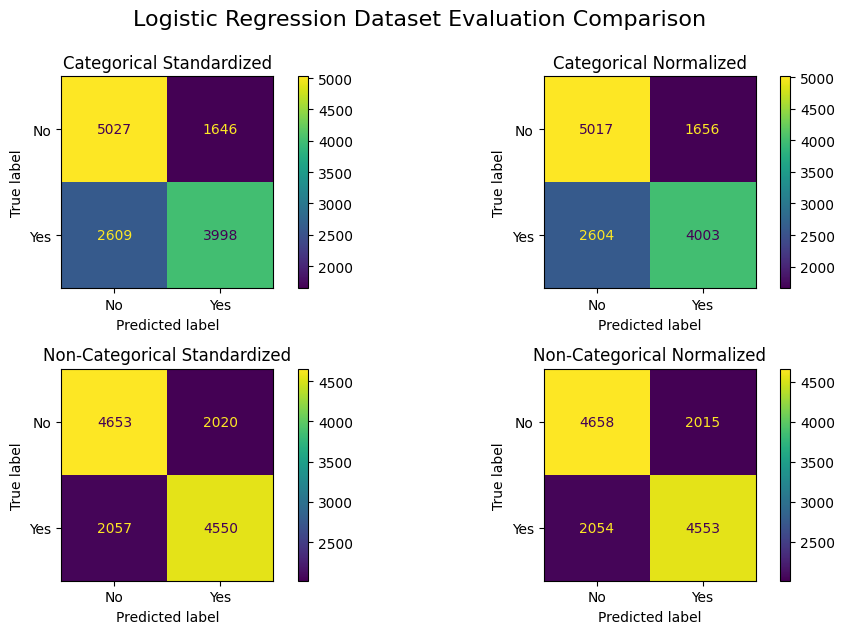

In [17]:
# variables to plot
ys = [y_cat_val, y_cat_val, y_raw_val, y_raw_val]
y_preds = [y_cat_std_pred, y_cat_minmax_pred, y_raw_std_pred, y_raw_minmax_pred]

# using evaluation plot function from scripts
fig = evaluate_predictions_plot(ys, y_preds, "Logistic Regression Dataset Evaluation Comparison")